# Import Essentials

## Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

> Dataset is obtained from this link: 
https://satudata.jakarta.go.id/open-data/detail?kategori=dataset&page_url=data-harga-bahan-pokok-di-provinsi-dki-jakarta&data_no=1

In [3]:
df = pd.read_csv('dataset/Data Harga Bahan Pokok di Provinsi DKI Jakarta.csv', sep=';')
df.head()

,periode_data,wilayah,tanggal,harga,komoditas
0,202401,Jakarta Utara,31,71927,Cabe Merah Keriting
1,202401,Jakarta Utara,31,78807,Cabe Merah Besar (TW)
2,202401,Jakarta Utara,31,74606,Cabe Rawit Merah
3,202401,Jakarta Utara,31,50977,Cabe Rawit Hijau
4,202401,Jakarta Utara,31,41985,Bawang Merah


# Data Preparation

## Data Introduction

In [4]:
df.shape

(1477, 5)

> This dataset has 1477 rows with 5 columns each.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periode_data  1477 non-null   int64 
 1   wilayah       1477 non-null   object
 2   tanggal       1477 non-null   int64 
 3   harga         1475 non-null   object
 4   komoditas     1477 non-null   object
dtypes: int64(2), object(3)
memory usage: 57.8+ KB


> Based on this information, it can be concluded that there are missing values since this dataset is not all equal by count. However, it is still necessary to check the categorical variables to see if there is mistyped value. Additionally, based on the column names, there is a column doesn't match its name.

## Match Data Type

In [6]:
df['periode'] = df['periode_data'].astype(str).str[:4] + '-' + df['periode_data'].astype(str).str[-2:] + '-' + df['tanggal'].astype(str)
df.insert(0, 'periode', df.pop('periode'))
df = df.drop(['periode_data', 'tanggal'], axis=1)

In [7]:
df['periode'] = pd.to_datetime(df['periode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   periode    1477 non-null   datetime64[ns]
 1   wilayah    1477 non-null   object        
 2   harga      1475 non-null   object        
 3   komoditas  1477 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 46.3+ KB


In [8]:
df['harga'] = pd.to_numeric(df['harga'], errors='coerce')
df = df.dropna(subset=['harga'])

In [9]:
df['harga'] = df['harga'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 0 to 1476
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   periode    1299 non-null   datetime64[ns]
 1   wilayah    1299 non-null   object        
 2   harga      1299 non-null   int32         
 3   komoditas  1299 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 45.7+ KB


> This action need to be done so that fewer settings will be required when uploading this data to any dashboard.

## Review Categorical Data Entries

> To shorten the codes, a function will be made so that it can be reused later by only calling the function and insert the parameters needed.

In [10]:
def check_mistypedVal(col_names):
  for i, j in enumerate(col_names):
    print('==============================')
    print((i + 1), j)
    print(df[j].value_counts())

In [11]:
col_names = ['wilayah', 'komoditas']
check_mistypedVal(col_names)

1 wilayah
wilayah
Kota Adm. Jakarta Utara      185
Kota Adm. Jakarta Barat      185
Kota Adm. Jakarta Timur      185
Kota Adm. Jakarta Pusat      183
Kota Adm. Jakarta Selatan    183
Jakarta Utara                 74
Jakarta Barat                 74
Jakarta Selatan               74
Jakarta Timur                 74
Jakarta Pusat                 74
KOTA ADM. JAKARTA PUSAT        3
KOTA ADM. JAKARTA SELATAN      3
KOTA ADM. JAKARTA TIMUR        1
KOTA ADM. JAKARTA UTARA        1
Name: count, dtype: int64
2 komoditas
komoditas
Daging Babi Berlemak               36
Kelapa Kupas                       36
Cabe Rawit Hijau                   36
Kentang (sedang)                   36
Susu Kental Bendera 200gr          35
Ikan Bandeng (sedang)              35
Ikan Mas                           35
Cabe Merah Besar (TW)              35
Gas Elpiji 3kg                     35
Cabe Merah Keriting                35
Daging Kambing                     35
Margarin Blueband Cup              35
Margarin Blueban

> Based on this information, it can be concluded that this dataset is well distributed (balance) and one of the categorical variables, 'Gender', has several mistyped values.

In [12]:
dict_wilayah = {
    'Kota Adm. Jakarta Utara' : 'Jakarta Utara',
    'KOTA ADM. JAKARTA UTARA' : 'Jakarta Utara',
    'Kota Adm. Jakarta Barat' : 'Jakarta Barat',
    'KOTA ADM. JAKARTA BARAT' : 'Jakarta Barat',
    'Kota Adm. Jakarta Pusat' : 'Jakarta Pusat',
    'KOTA ADM. JAKARTA PUSAT' : 'Jakarta Pusat',
    'Kota Adm. Jakarta Timur' : 'Jakarta Timur',
    'KOTA ADM. JAKARTA TIMUR' : 'Jakarta Timur',
    'Kota Adm. Jakarta Selatan' : 'Jakarta Selatan',
    'KOTA ADM. JAKARTA SELATAN' : 'Jakarta Selatan'
}
df = df.replace(dict_wilayah)

In [13]:
dict_komoditas = {
    'Beras IR. I (IR 64)' : 'Beras IR I (IR 64)',
    'Beras IR. II (IR 64) Ramos' : 'Beras IR II (IR 64) Ramos',
    'Beras IR. III (IR 64)' : 'Beras IR III (IR 64)',
    'Beras Muncul .I' : 'Beras Muncul I',
    'Gas Elpiji (3 kg)' : 'Gas Elpiji 3kg',
    'Minyak Goreng (Kuning / Curah)' : 'Minyak Goreng (Kuning/Curah)',
    'Susu Bubuk Dancow (400 gr)' : 'Susu Bubuk Dancow 400gr'
}
df = df.replace(dict_komoditas)

In [14]:
check_mistypedVal(col_names)

1 wilayah
wilayah
Jakarta Utara      260
Jakarta Timur      260
Jakarta Pusat      260
Jakarta Selatan    260
Jakarta Barat      259
Name: count, dtype: int64
2 komoditas
komoditas
Daging Babi Berlemak               36
Minyak Goreng (Kuning/Curah)       36
Cabe Rawit Hijau                   36
Gas Elpiji 3kg                     36
Kelapa Kupas                       36
Kentang (sedang)                   36
Margarin Blueband Cup              35
Ikan Lele                          35
Susu Bubuk Dancow 400gr            35
Susu Kental Bendera 200gr          35
Susu Kental Enak 200gr             35
Margarin Blueband Sachet           35
Ikan Bandeng (sedang)              35
Beras IR I (IR 64)                 35
Beras IR II (IR 64) Ramos          35
Beras IR III (IR 64)               35
Beras Muncul I                     35
Beras IR 42/Pera                   35
Beras Setra I/Premium              35
Ikan Mas                           35
Cabe Merah Keriting                35
Cabe Merah Besar (TW)

> Hence, it can be concluded that there is no more mistyped values in those categorical variables.

## Data Cleaning

> It seems that there is an anomaly in the data where a value appears only once in the commodity column, while other values appear multiple times. Hence, rows that deviate significantly from expected patterns or values are removed to improve data quality.

In [15]:
df = df[df['komoditas'] != 'Muncul I']

# Exploratory Data Analysis (EDA)

In [16]:
def visualize(df, x, y, z, title, type):
  plt.figure(figsize=(20, 5))
  if (type == 'line'):
    plt.plot(x, y, data=df, marker='o')
  elif (type == 'bar'):
    df = df.sort_values(y, ascending=True).head(min(df[x].nunique(), 10))
    plt.bar(x, y, data=df.sort_values(y, ascending=False))
  elif (type == 'grouped-bar'):
    df = df.sort_values(z, ascending=True)
    sns.barplot(x=x, y=y, hue=z, data=df)
  else:
    df = df.sort_values(x, ascending=True).head(min(df[x].nunique(), 10))
    plt.pie(df[y], labels=df[x], autopct='%.2lf%%')
  plt.title(title)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

## Daily Trend

> This shows daily trend as the price of each commodity per region, sorted by Date.

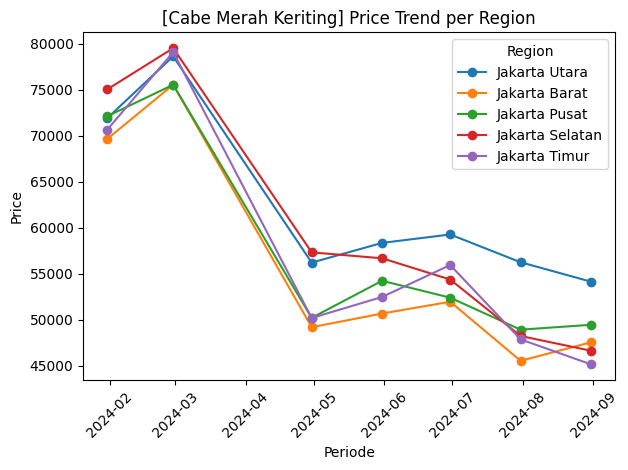

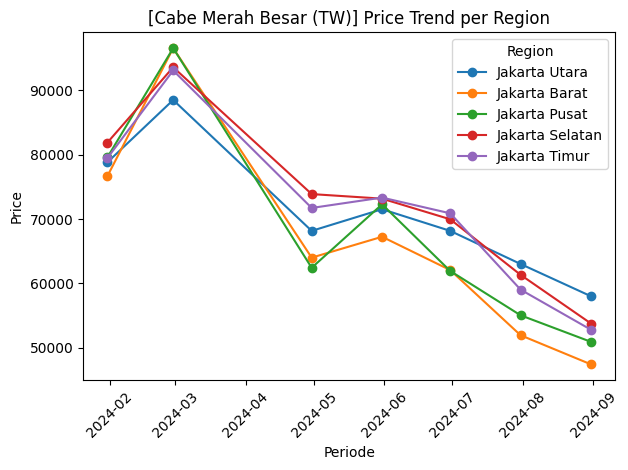

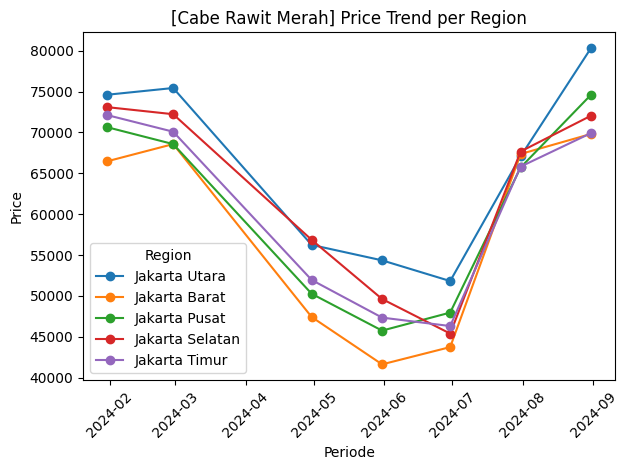

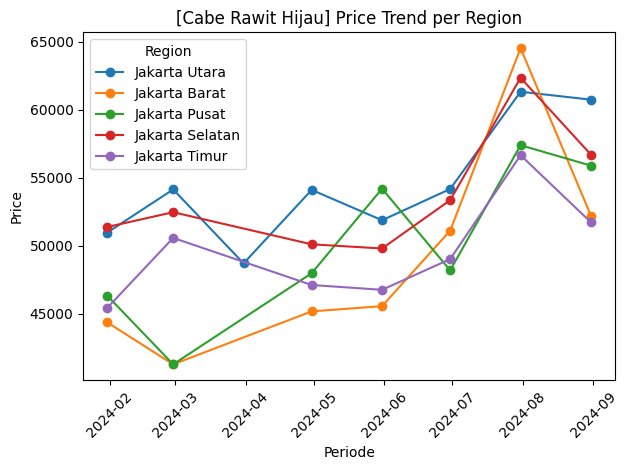

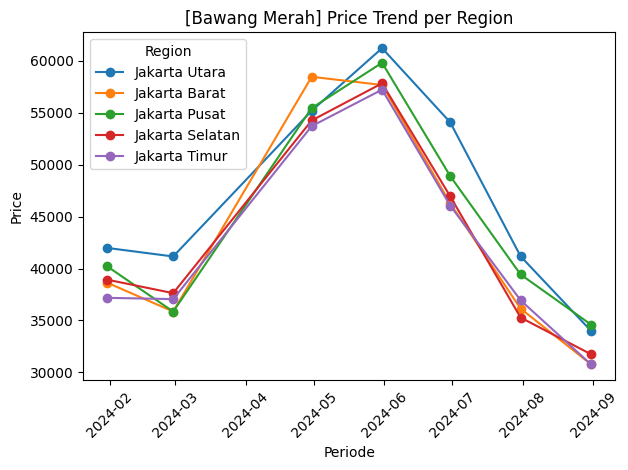

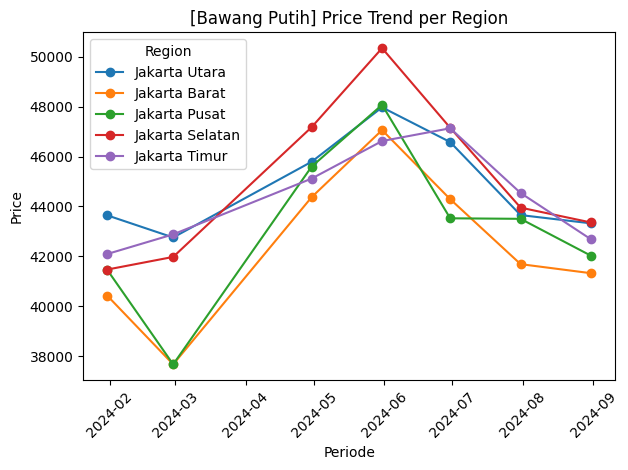

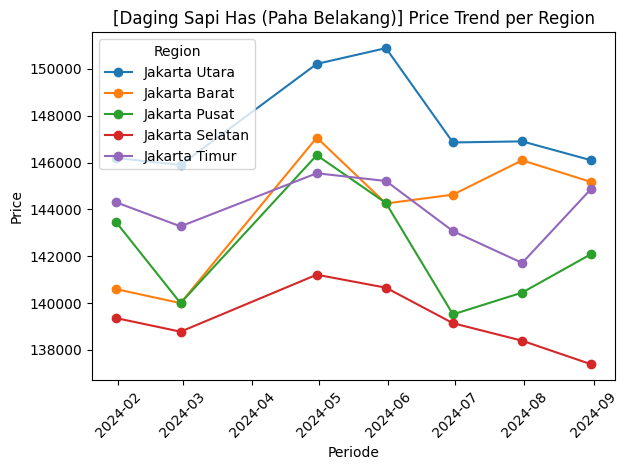

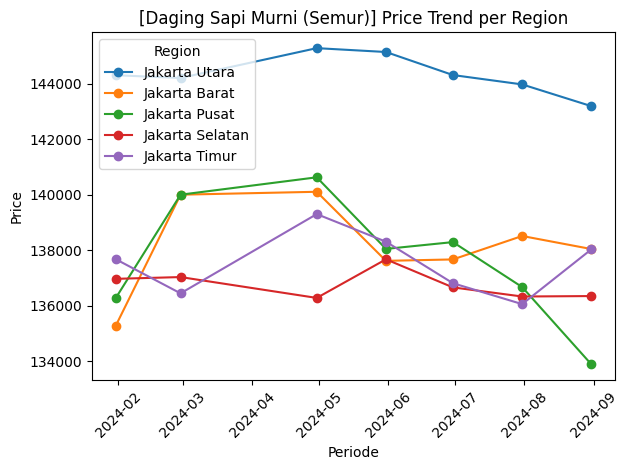

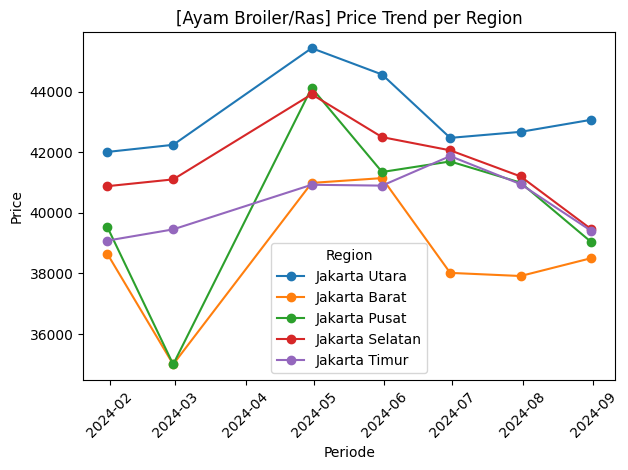

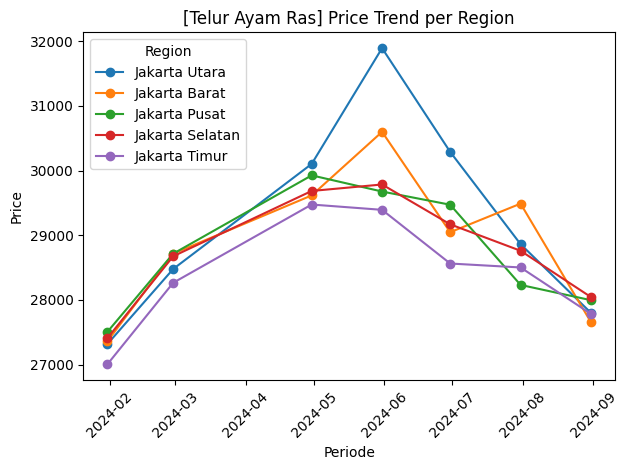

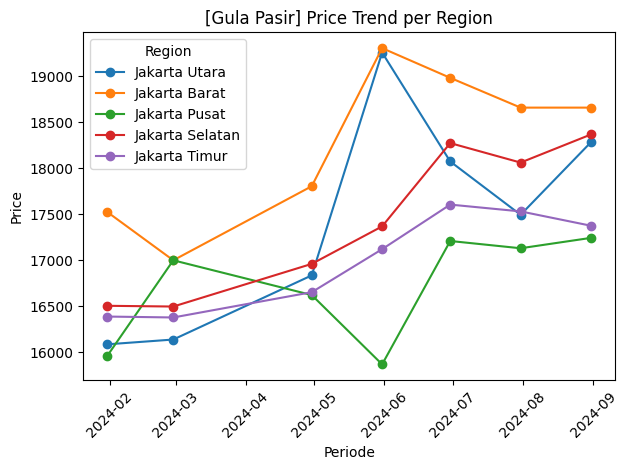

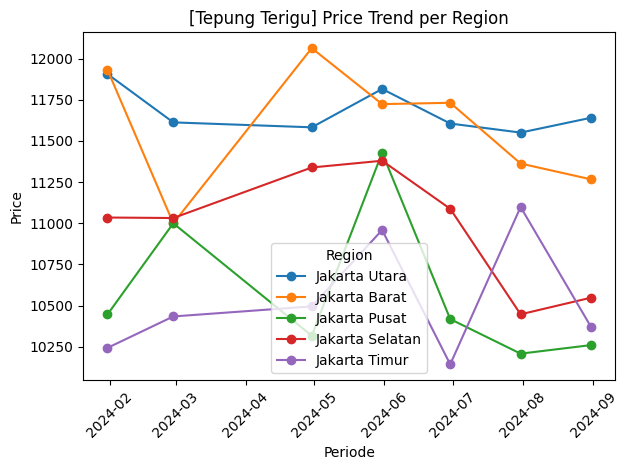

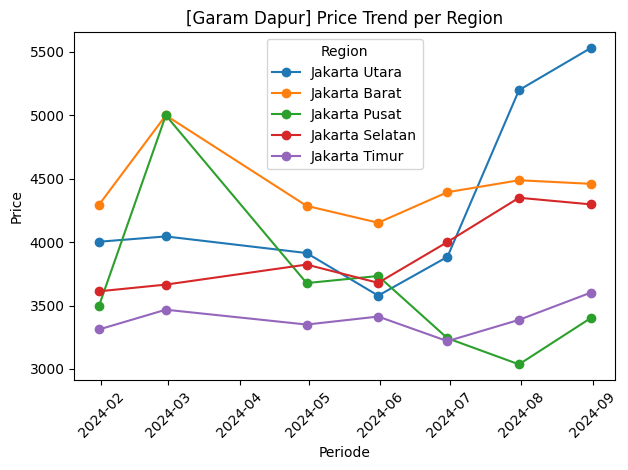

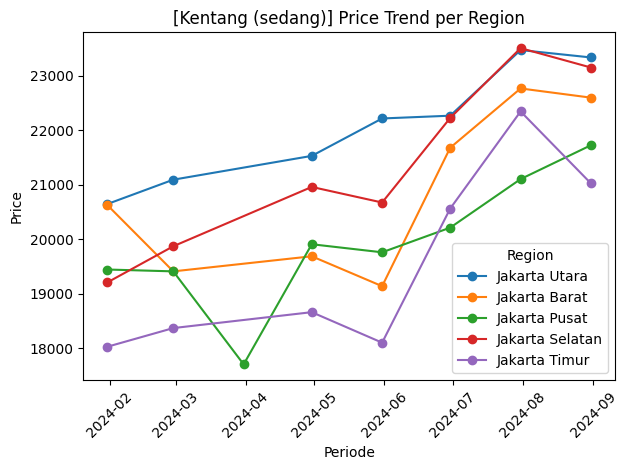

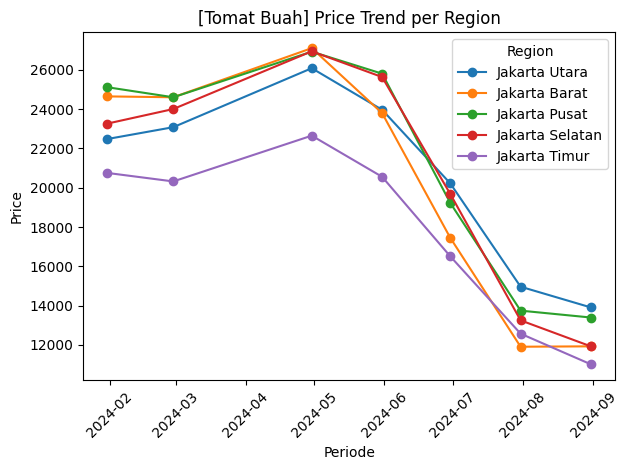

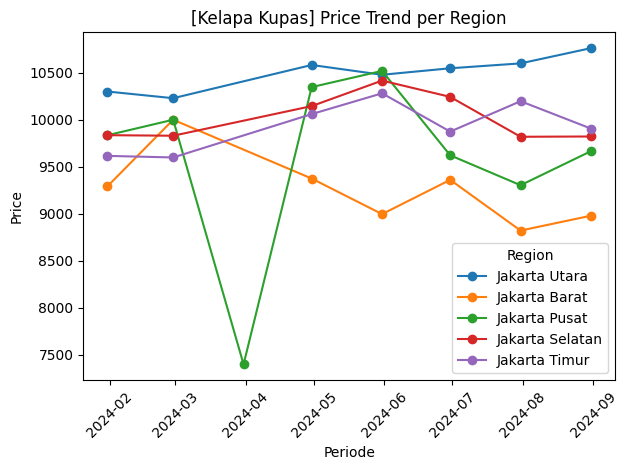

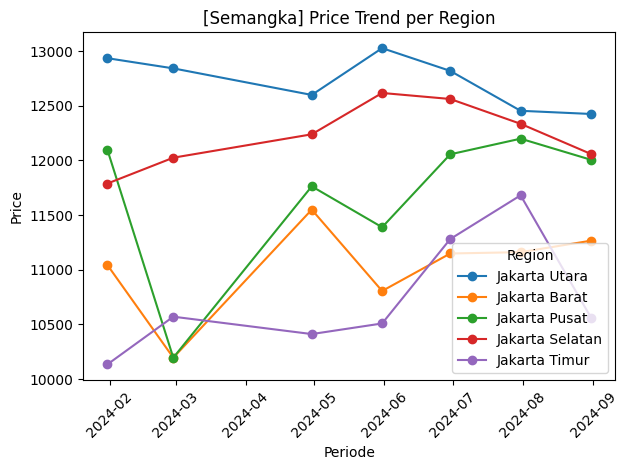

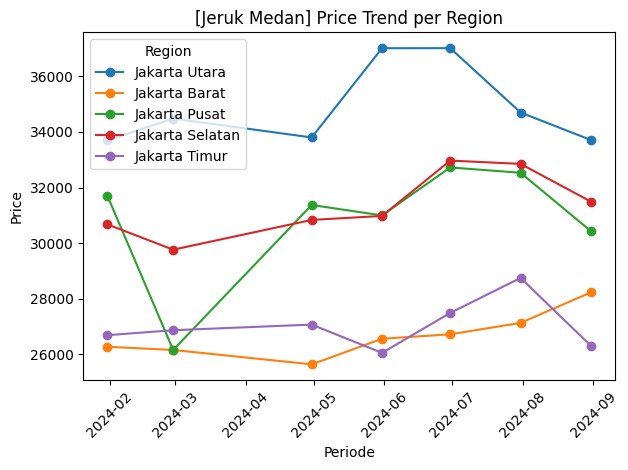

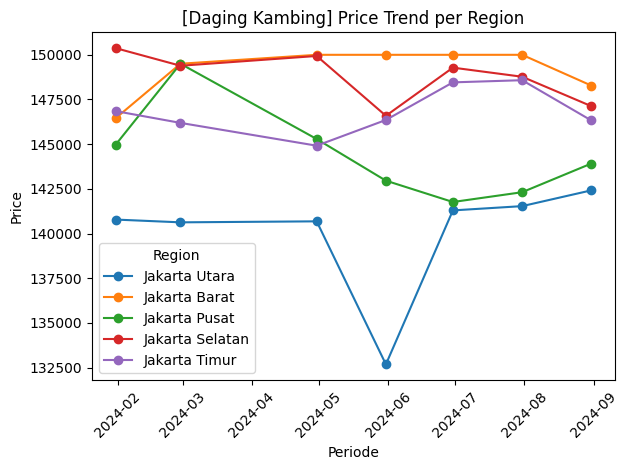

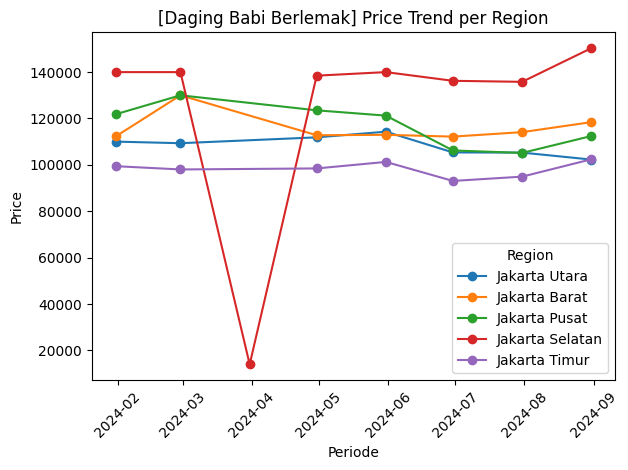

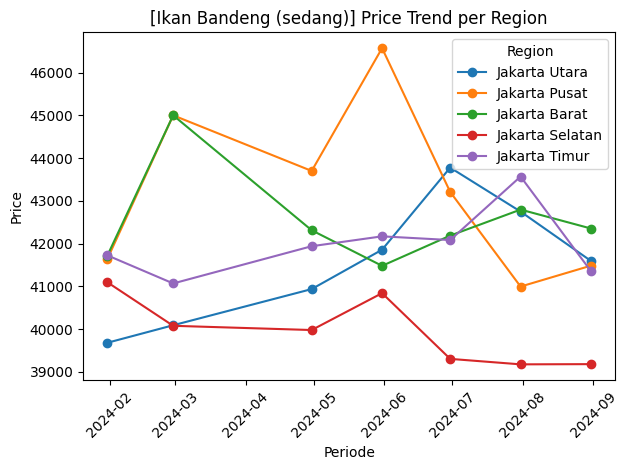

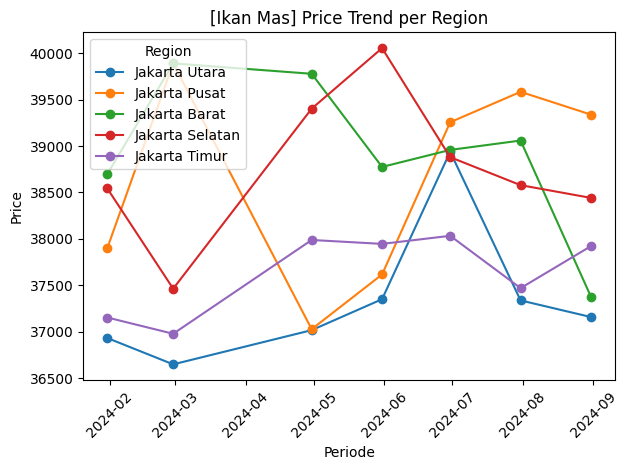

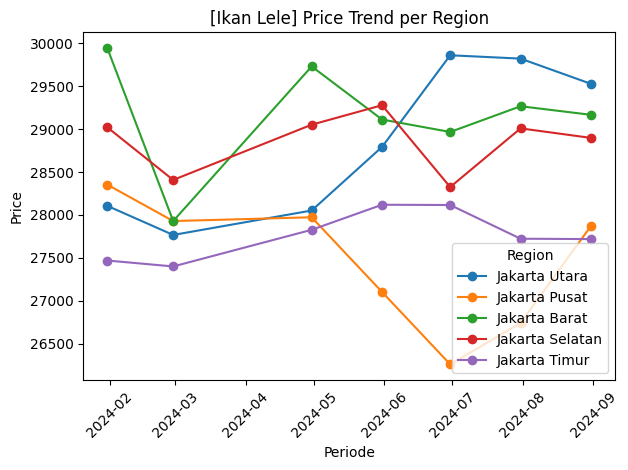

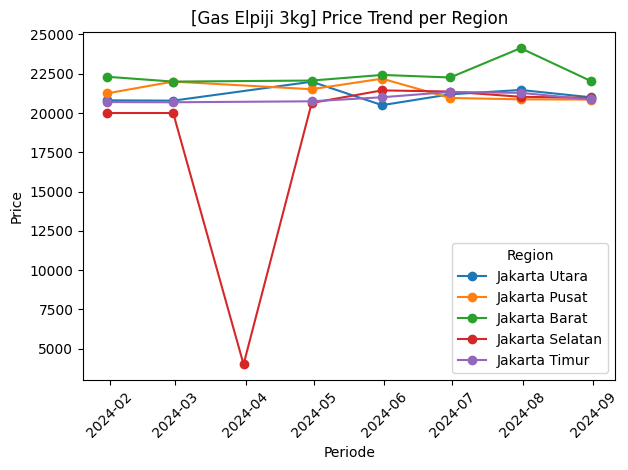

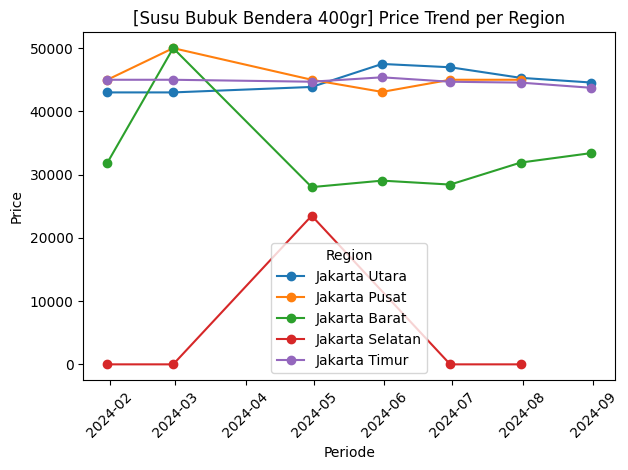

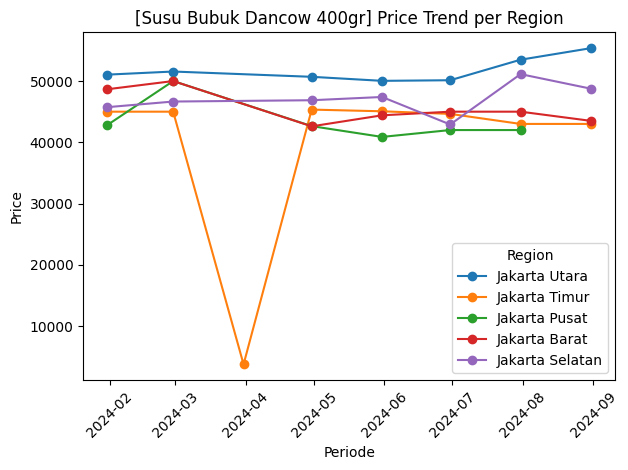

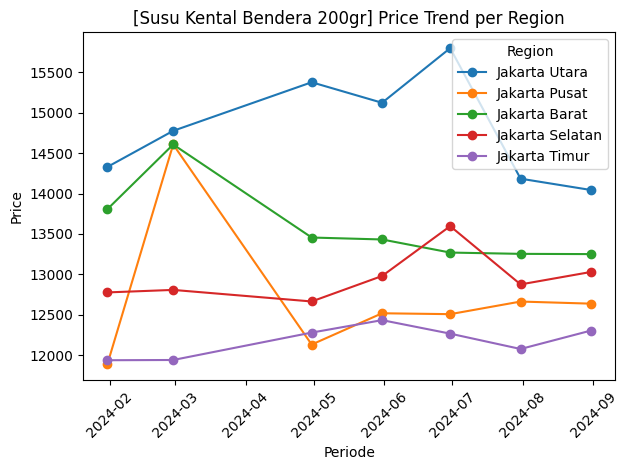

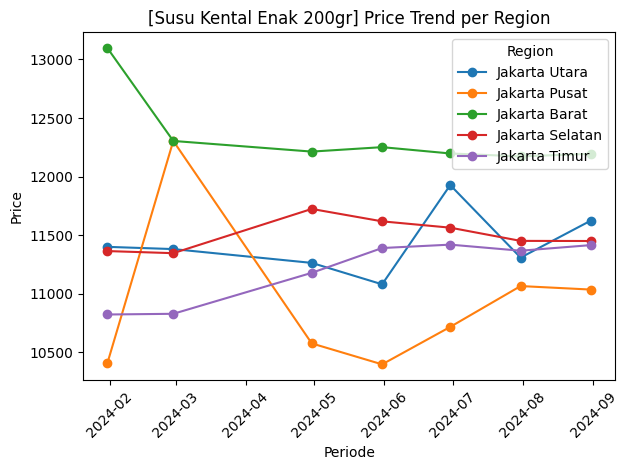

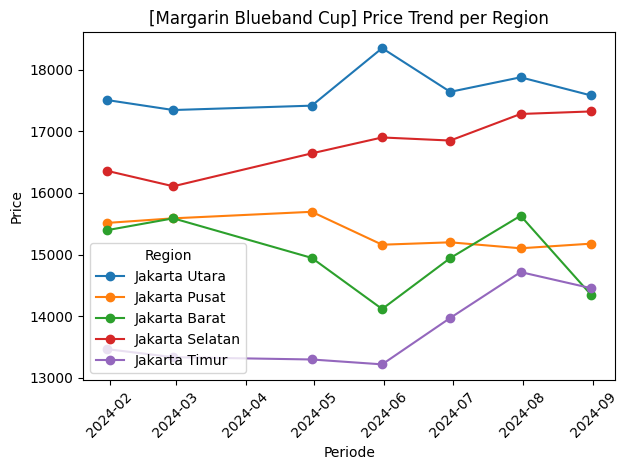

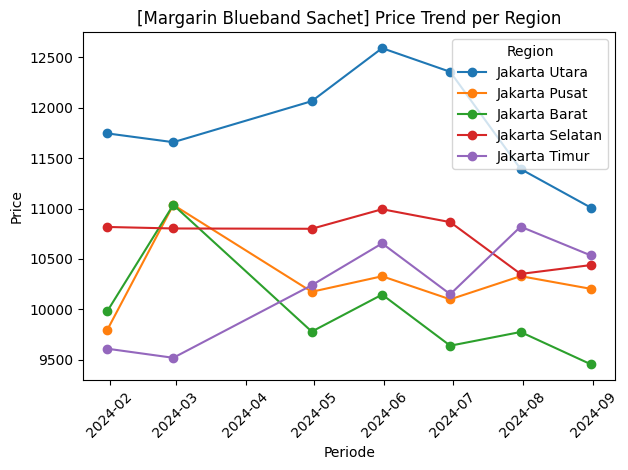

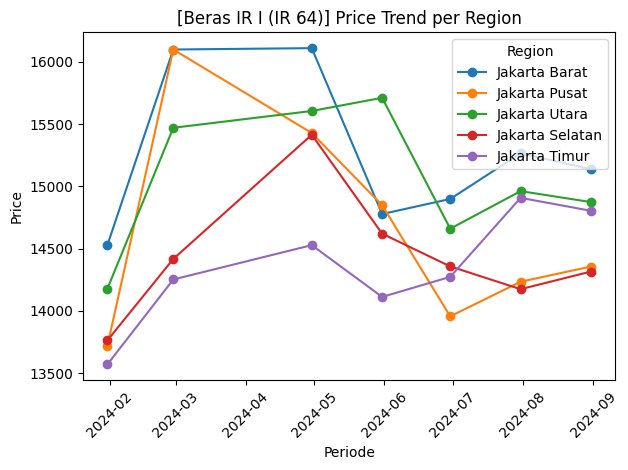

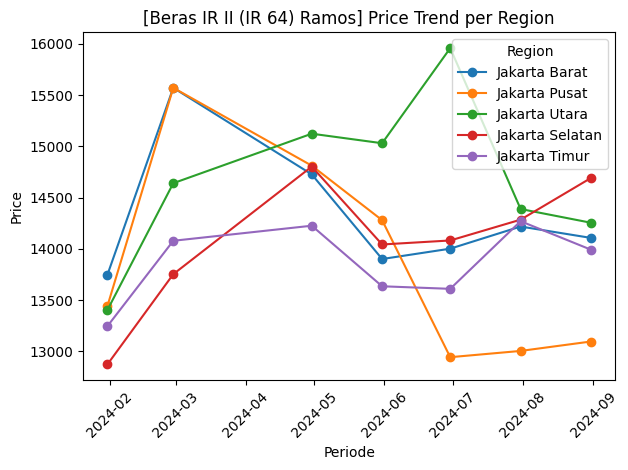

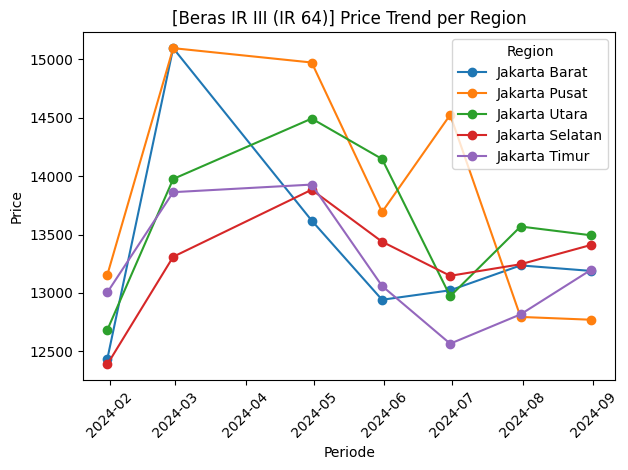

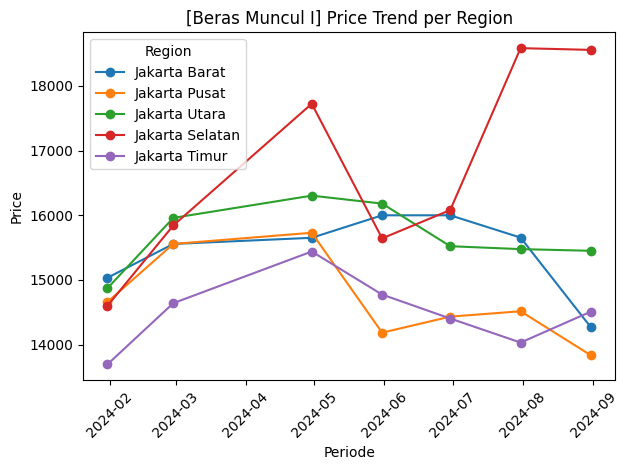

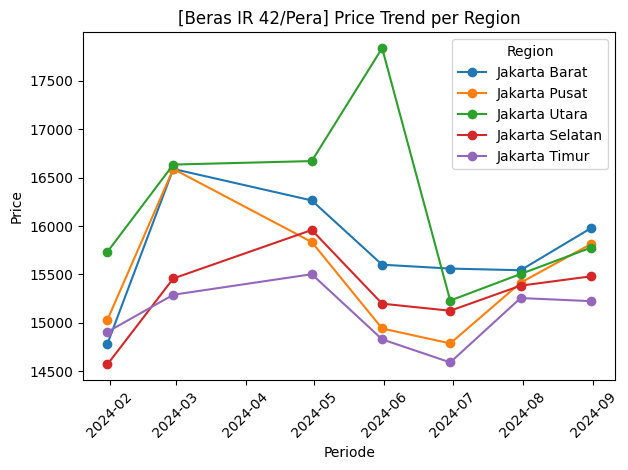

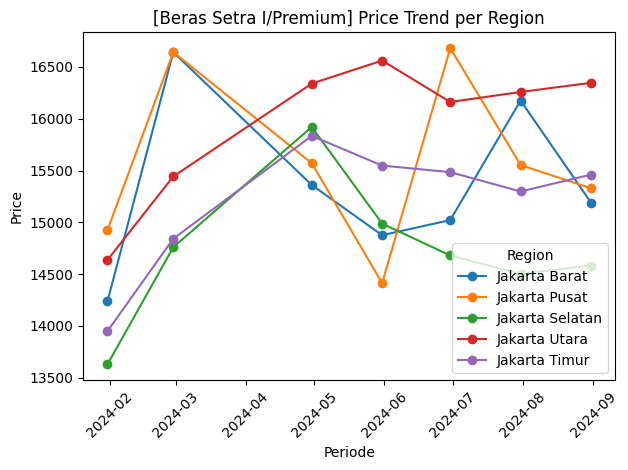

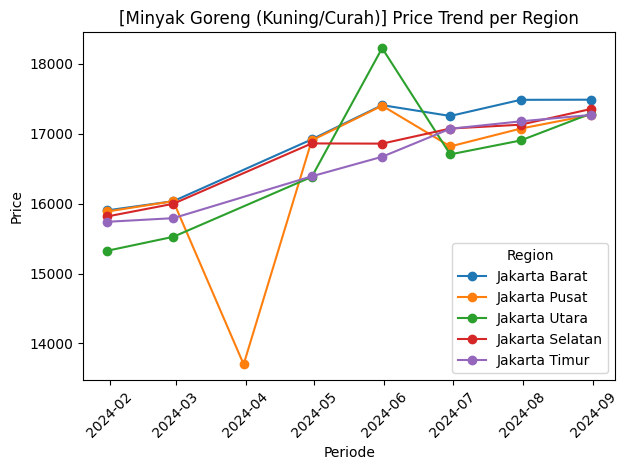

In [17]:
for commodity in df['komoditas'].unique():
    subset_commodity = df[df['komoditas'] == commodity]
    for region in subset_commodity['wilayah'].unique():
        subset_region = subset_commodity[subset_commodity['wilayah'] == region]
        subset_region = subset_region.sort_values('periode')
        plt.plot(subset_region['periode'], subset_region['harga'], marker='o', label=region)
    plt.title(f'[{commodity}] Price Trend per Region')
    plt.xlabel('Periode')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend(title='Region')
    plt.tight_layout()
    plt.show()

> Based on this information, it can be observed that although these regions are within the same city, the prices of essential goods can sometimes vary significantly. This disparity may arise due to the differing needs and demands in each area.

## Get the Data ready

In [18]:
df.to_csv('dataset/jakartaGroceriesPrices_output.csv', index=False)

# Data Visualization

> Data Visualization will be conducted on Looker Studio/Google Data Studio and can be accessed by this link:
https://lookerstudio.google.com/reporting/49ad8df0-a305-4d84-8be5-f580f2679eec

> Data Visualization will also be conducted on Tableu and can be accessed by this link:
https://public.tableau.com/app/profile/ainkrx/viz/JakartaGroceriesPrices/Dashboard